In [1]:
import pandas as pd

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("model_only_data.csv")

In [3]:
df.head()

,Unnamed: 0,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result
0,0,9600.0,Credit card refinancing,24.45,816xx,CO,4 years,1,1
1,1,6000.0,Home improvement,14.34,210xx,MD,10+ years,1,1
2,2,10000.0,Debt consolidation,25.35,890xx,NV,7 years,1,1
3,3,25000.0,Debt consolidation,7.17,640xx,MO,5 years,1,1
4,4,2000.0,Other,9.30,923xx,CA,4 years,1,1


## Breakdown of Features in Preparation for Models

### Handling Reason for Loan

In [4]:
df['reason_for_loan'].value_counts()[0:15]

Debt consolidation         75380
Credit card refinancing    29157
debt_consolidation         21376
Other                      15117
Home improvement            7677
other                       7180
credit_card                 4847
Major purchase              3911
Car financing               3751
home_improvement            2536
Medical expenses            2509
Home buying                 2364
Moving and relocation       1820
car                         1801
Business                    1706
Name: reason_for_loan, dtype: int64

In [5]:
import nltk

In [6]:
from nltk.stem import WordNetLemmatizer

In [7]:
corpus = ""

In [8]:
i = 0
while i < len(df['reason_for_loan']):
    corpus += " " + df['reason_for_loan'][i]
    i += 1

In [9]:
words = nltk.word_tokenize(corpus)

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\orteg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

In [12]:
stop_words = set(stopwords.words("english")) # creating a list of stop words in the english language

In [13]:
filtered_list = []
for word in words: # For every word
    if word.casefold() not in stop_words: # Is the lowercase word in the stop words list?
        filtered_list.append(word)

In [14]:
filtered_list[0:5]

['Credit', 'card', 'refinancing', 'Home', 'improvement']

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
lemma_corpus = []
no_match = []

In [17]:
for word, tag in nltk.pos_tag(filtered_list):
    wntag = tag[0].lower()
    wntag = wntag if wntag in ['n'] else None
    if not wntag:
        lemma = word # if it is not one of the above word types
        no_match.append(lemma)
    else:
        lemma = lemmatizer.lemmatize(word, wntag) # using the tag to properly reduce the word
        lemma_corpus.append(lemma)

In [18]:
len(no_match)

39356

In [19]:
len(lemma_corpus)

306755

In [20]:
no_match_series = pd.Series(no_match)

In [21]:
no_match_series.value_counts()

refinancing     29171
Moving           1603
moving           1433
medical          1296
credit_card      1162
                ...  
prison              1
limousine           1
add                 1
cdloan020512        1
payoff101           1
Length: 755, dtype: int64

In [22]:
lemma_corpus_series = pd.Series(lemma_corpus)

In [23]:
lemma_corpus_series.value_counts()

Debt                  77131
consolidation         76015
Credit                30139
card                  29697
debt_consolidation    21372
                      ...  
CJLoan                    1
Considation               1
Javier                    1
LOVE                      1
moving                    1
Length: 2478, dtype: int64

I will be using, approximately, the top 100 words to use as a filter when processing the loan reason column. I will use the most frequent values before processing as categories. I will also clarify words that can have multiple meanings. When processing, the order of each category will matter. I will try to use words that do not conflict with other categories

In [24]:
lemma_corpus_series.value_counts().index[0:100]

Index(['Debt', 'consolidation', 'Credit', 'card', 'debt_consolidation', 'Home',
       'improvement', 'purchase', 'Car', 'credit_card', 'financing', 'Major',
       'Business', 'Medical', 'expense', 'Loan', 'buying', 'home_improvement',
       'car', 'relocation', 'Consolidation', 'major_purchase', 'Vacation',
       'small_business', 'loan', 'debt', 'vacation', 'Card', 'house', 'credit',
       'Moving', 'Personal', 'Pay', 'Payoff', 'Consolidate', 'Refinance',
       'Improvement', 'CC', 'Cards', 'Green', 'pay', 'payoff', 'home', 'bill',
       'Wedding', 'refinance', 'Freedom', 'Free', 'New', 'DEBT',
       'renewable_energy', 'interest', 'consolidate', 'CONSOLIDATION', 'Get',
       'payment', 'Help', 'Club', 'Lending', 'Bill', 'rate', 'LOAN',
       'Purchase', 'CREDIT', 'Refi', 'freedom', 'Expenses', 'Pool', 'Relief',
       'Bills', 'Small', 'CARD', 'Interest', 'Lower', 'Start', 'money',
       'Consolodation', 'repair', 'High', 'Life', 'life', 'Payment', 'House',
       'Refinan

In [25]:
lemma_corpus_series.value_counts().index[100:150]

Index(['Line', 'Kitchen', 'Fresh', 'Engagement', 'Family', 'Ring', 'cc',
       'pool', 'Consolidating', 'Project', 'Time', 'Repayment', 'LC', 'CARDS',
       'Motorcycle', 'Clean', 'Auto', 'Chase', 'wedding', 'Better', 'Debts',
       'Repair', 'School', 'need', 'debit', 'Financial', 'Reduction', 'time',
       'Education', 'Money', 'Getting', 'PAY', 'Investment', '/', 'track',
       'FREE', 'First', 'reduction', 'Good', 'start', 'Future', 'way', 'Gone',
       'Expense', 'DC', 'remodel', 'Track', 'Move', 'tax', 'Repairs'],
      dtype='object')

In [26]:
no_match_series.value_counts().index[0:50]

Index(['refinancing', 'Moving', 'moving', 'medical', 'credit_card',
       'home_improvement', 'Major', 'financing', 'small_business', 'buying',
       '!', 'major_purchase', 'personal', 'wedding', 'free', '.', ''s', '&',
       '1', 'high', 'renewable_energy', 'pay', ',', 'Paying', 'new', '2013',
       '2012', 'one', 'payoff', 'get', '-', 'lower', '2', 'consolidate',
       'Getting', 'back', 'Consolidating', ')', '3', 'gone', 'One', 'getting',
       'Wedding', 'major', 'better', 'paying', 'financial', '2nd', '2011',
       '2010'],
      dtype='object')

In [27]:
home = ['home', 'house', 'kitchen', 'improvement', 'pool', 'remodel']
car = ['car', 'auto', 'motorcycle', 'vehicle', 'truck']
business = ['business']
medical = ['medical', 'remove']
debt_credit_issues = ['consolidation', 'credit', 'debt', 'refinancing', 'card', 'cc', 'consolidate', 'payoff', 
                      'interest', 'rate'] 
moving = ['move', 'moving']
major_purchase = ['purchase', 'major']
vacation = ['vacation']
wedding = ['wedding', 'ring']
student = ['student', 'college', 'education', 'school']
#If not categories match, then it will be placed into the 'other' category

In [28]:
l = []
for thing in df['reason_for_loan']:
    if thing.find("Pool") != -1:
        l.append(thing)
print(pd.unique(l))

['Pool & Landscaping' 'Pool Renovation' 'Pool Repairs'
 'Swimming Pool Maintenance Loan' 'Above Ground Pool' 'Swimming Pool'
 'Pool Loan' 'Pool loan ' 'Swimming Pool Project 2012' 'Pool'
 'Pool House Renovations' 'Home Pool Loan'
 'Winter Storm Destruction -Pool' 'Pool and landscape' 'Pool Improvement'
 'Pool Loan ' 'Pool funding ' 'Say No To Bugs! - Pool Screen Cage'
 'Pool Repair']


In [29]:
l = []
for thing in df['reason_for_loan']:
    if thing.find("refinancing") != -1:
        l.append(thing)
print(pd.unique(l))

['Credit card refinancing' 'crdit card refinancing' 'refinancing'
 'credit refinancing' 'Credit card refinancing at lower rate'
 'credit card refinancing' 'Credit Card refinancing'
 'Debt / Credit card refinancing' 'refinancing credit cards'
 'cc refinancing & debt consolidation' 'debt refinancing'
 'refinancing 19% CARD' 'refinancing high interest credit cards']


In [30]:
l = []
for thing in df['reason_for_loan']:
    if thing.find("purchase") != -1:
        l.append(thing)
print(pd.unique(l))

['Major purchase' 'Loan for purchase of a project vehicle'
 'loan for ebay purchase' 'purchase' 'major purchase loan'
 'major_purchase' 'major purchase for equipment for job' 'major purchase'
 'property purchase' 'Consolidate debt/small purchases' 'purchase of car'
 'consolidate and purchase loan' 'equipment purchase'
 'deby consolidation major purchase' 'Loan for a Major Appliance purchase'
 'for a major purchase ' 'purchase of mobile home'
 'Loan for purchase of road tractor' 'Equipment purchase']


Issues:
-Words have multiple meanings 
-Obervations can match multiple categories
-Misspelling
-Is what they write what they mean? (freedom loans)

I will go from specific to general debt consolidation and credit card issues. Lastly, we will have other.

In [31]:
df["reduced_reason"] = "Test"

In [32]:
df['reason_for_loan'] = df['reason_for_loan'].apply(str.lower)

In [33]:
my_dict = {"Home": home, "Car": car, "Business": business, "Medical": medical, "Vacation": vacation, "Wedding": wedding,
        "Moving": moving, "Student": student, "Major Purchse": major_purchase, "Debt/Credit Issues": debt_credit_issues}

In [34]:
for k, v in my_dict.items():
    for word in v:
        df.loc[df['reason_for_loan'].str.contains(word), 'reduced_reason'] = k

In [35]:
df['reduced_reason'].value_counts()

Debt/Credit Issues    136164
Test                   25352
Home                   13689
Car                     5709
Major Purchse           5686
Business                4160
Medical                 3855
Moving                  3308
Vacation                1786
Wedding                  221
Student                   70
Name: reduced_reason, dtype: int64

In [36]:
df['reason_for_loan'][df['reduced_reason'] == "Test"].value_counts()

other               22297
personal loan         159
green loan            139
renewable_energy      113
personal               91
                    ...  
summer 2012             1
educateme               1
relax relax             1
a safe bet              1
pay irs                 1
Name: reason_for_loan, Length: 1795, dtype: int64

I think that these are pretty great results!! Now we set the vague responses to "Other."

In [37]:
df['reduced_reason'][df['reduced_reason'] == "Test"] = "Other"

C:\Users\orteg\AppData\Local\Temp\ipykernel_38420\57583683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reduced_reason'][df['reduced_reason'] == "Test"] = "Other"


In [38]:
df['reduced_reason'].value_counts()

Debt/Credit Issues    136164
Other                  25352
Home                   13689
Car                     5709
Major Purchse           5686
Business                4160
Medical                 3855
Moving                  3308
Vacation                1786
Wedding                  221
Student                   70
Name: reduced_reason, dtype: int64

### Handling the Employee Length Column

I am going to rank the employment length. 0 is < 1 year and 10 is 10+ years.

In [39]:
ranking = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
          '8 years', '9 years', '10+ years']

In [40]:
df['emp_length'].value_counts()

< 1 year     94715
10+ years    37076
5 years      15176
2 years      10520
3 years       9224
1 year        8021
4 years       6866
6 years       5163
8 years       4645
7 years       4594
9 years       4000
Name: emp_length, dtype: int64

In [41]:
df_new = df.copy()

In [42]:
for index, value in enumerate(ranking):
    df_new.loc[df_new['emp_length'].str.contains(value), 'emp_length'] = str(index)

In [43]:
df_new['emp_length'].value_counts()

0            94715
10+ years    37076
5            15176
2            10520
3             9224
1             8021
4             6866
6             5163
8             4645
7             4594
9             4000
Name: emp_length, dtype: int64

In [44]:
df_new.loc[df_new['emp_length'].str.contains('10+'), 'emp_length'] = str(10)

In [45]:
df_new['emp_length'].value_counts()

0     94715
10    37076
5     15176
2     10520
3      9224
1      8021
4      6866
6      5163
8      4645
7      4594
9      4000
Name: emp_length, dtype: int64

In [46]:
df_new['emp_length'] = df_new['emp_length'].astype("int64")

### Review

In [47]:
df_new.head()

,Unnamed: 0,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result,reduced_reason
0,0,9600.0,credit card refinancing,24.45,816xx,CO,4,1,1,Debt/Credit Issues
1,1,6000.0,home improvement,14.34,210xx,MD,10,1,1,Home
2,2,10000.0,debt consolidation,25.35,890xx,NV,7,1,1,Debt/Credit Issues
3,3,25000.0,debt consolidation,7.17,640xx,MO,5,1,1,Debt/Credit Issues
4,4,2000.0,other,9.30,923xx,CA,4,1,1,Other


In [48]:
df_new.columns

Index(['Unnamed: 0', 'amount_requested', 'reason_for_loan',
       'debt_to_income_ratio', 'zip_code', 'state', 'emp_length',
       'policy_code', 'applicant_result', 'reduced_reason'],
      dtype='object')

I will remove the useless index column.

In [49]:
df_new.drop(['Unnamed: 0'], inplace=True, axis=1)

In [50]:
df_new.head()

,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result,reduced_reason
0,9600.0,credit card refinancing,24.45,816xx,CO,4,1,1,Debt/Credit Issues
1,6000.0,home improvement,14.34,210xx,MD,10,1,1,Home
2,10000.0,debt consolidation,25.35,890xx,NV,7,1,1,Debt/Credit Issues
3,25000.0,debt consolidation,7.17,640xx,MO,5,1,1,Debt/Credit Issues
4,2000.0,other,9.30,923xx,CA,4,1,1,Other


### Dealing with Amount Requested

In [51]:
import matplotlib.pyplot as plt

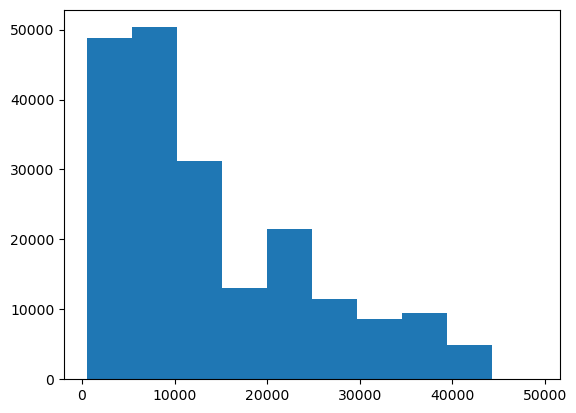

In [52]:
plt.hist(df_new['amount_requested'][df_new['amount_requested'] < 50000])
plt.show()

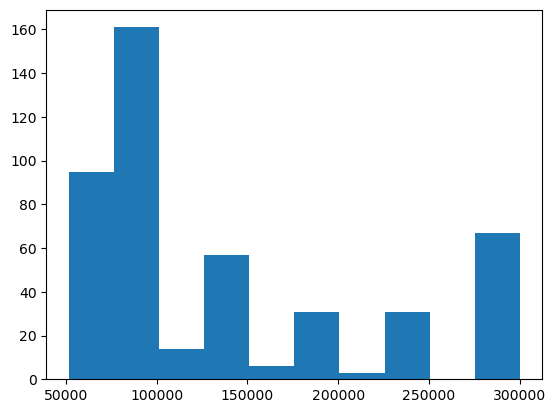

In [53]:
plt.hist(df_new['amount_requested'][df_new['amount_requested'] > 50000])
plt.show()

Considering the variety of reasons people apply for loans, I do not think it is valid to set any limit on the amount requested. I think the variation is natural.

### Dealing with DTI Ratio

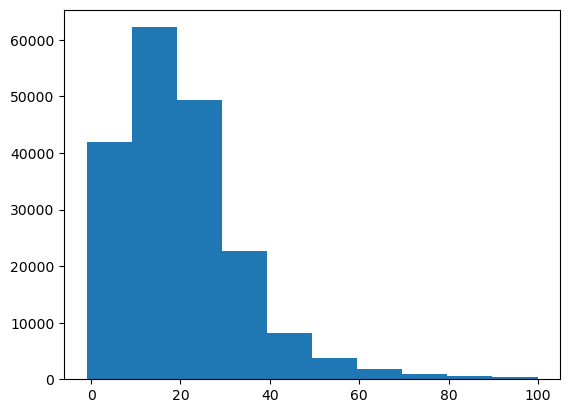

In [54]:
plt.hist(df_new['debt_to_income_ratio'][df_new['debt_to_income_ratio'] < 100])
plt.show()

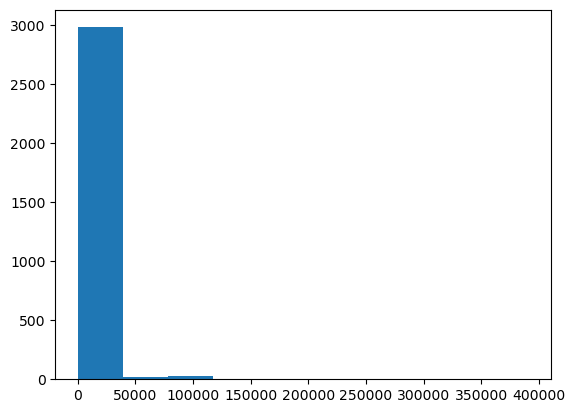

In [55]:
plt.hist(df_new['debt_to_income_ratio'][df_new['debt_to_income_ratio'] > 100])
plt.show()

In [56]:
len(df_new['debt_to_income_ratio'][df_new['debt_to_income_ratio'] > 100])

3037

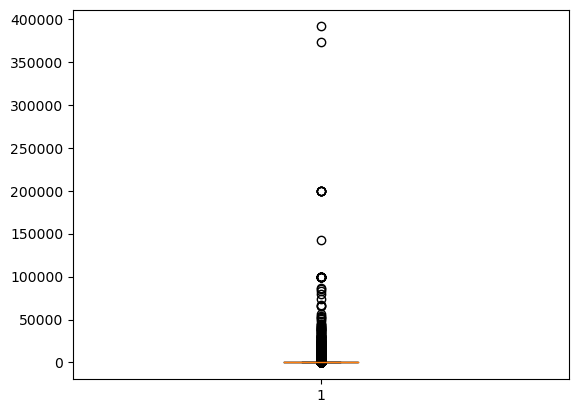

In [57]:
plt.boxplot(df_new['debt_to_income_ratio'])
plt.show()

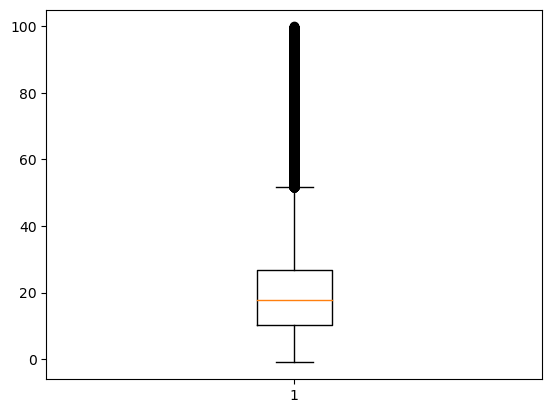

In [58]:
plt.boxplot(df_new['debt_to_income_ratio'][df_new['debt_to_income_ratio'] < 100])
plt.show()

Based on the odd behavior of ratios, I think removing the rows that have ratios greater than 100% is the best course of action. If I find arguments against this, I will change the method.

In [59]:
df_new = df_new[df_new['debt_to_income_ratio'] <= 100]

In [60]:
df_new.reset_index(drop=False, inplace=True)
df_new = df_new.drop('index', axis=1)

### Handling Categorical Variables

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196963 entries, 0 to 196962
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amount_requested      196963 non-null  float64
 1   reason_for_loan       196963 non-null  object 
 2   debt_to_income_ratio  196963 non-null  float64
 3   zip_code              196963 non-null  object 
 4   state                 196963 non-null  object 
 5   emp_length            196963 non-null  int64  
 6   policy_code           196963 non-null  int64  
 7   applicant_result      196963 non-null  int64  
 8   reduced_reason        196963 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 13.5+ MB


In [62]:
df_new.head()

,amount_requested,reason_for_loan,debt_to_income_ratio,zip_code,state,emp_length,policy_code,applicant_result,reduced_reason
0,9600.0,credit card refinancing,24.45,816xx,CO,4,1,1,Debt/Credit Issues
1,6000.0,home improvement,14.34,210xx,MD,10,1,1,Home
2,10000.0,debt consolidation,25.35,890xx,NV,7,1,1,Debt/Credit Issues
3,25000.0,debt consolidation,7.17,640xx,MO,5,1,1,Debt/Credit Issues
4,2000.0,other,9.30,923xx,CA,4,1,1,Other


In [63]:
cat_df = df_new.drop(['amount_requested', 'debt_to_income_ratio', 'reason_for_loan', 'applicant_result'], axis=1)

In [64]:
cat_df = pd.get_dummies(cat_df)

In [65]:
cat_df.shape

(196963, 969)

In [66]:
cat_df.head()

,emp_length,policy_code,zip_code_000xx,zip_code_002xx,zip_code_006xx,zip_code_007xx,zip_code_008xx,zip_code_009xx,zip_code_010xx,zip_code_011xx,...,reduced_reason_Car,reduced_reason_Debt/Credit Issues,reduced_reason_Home,reduced_reason_Major Purchse,reduced_reason_Medical,reduced_reason_Moving,reduced_reason_Other,reduced_reason_Student,reduced_reason_Vacation,reduced_reason_Wedding
0,4,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,7,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Handling Numeric Variables

In [67]:
num_df = df_new[['amount_requested', 'debt_to_income_ratio']]

In [68]:
 from sklearn import preprocessing

In [69]:
std_num_df = preprocessing.scale(num_df, axis=0)

In [70]:
std_num_df = pd.DataFrame(std_num_df, columns = num_df.columns, index = num_df.index)
std_num_df.describe()

,amount_requested,debt_to_income_ratio
count,1.969630e+05,1.969630e+05
mean,-7.407462e-15,2.414309e-15
std,1.000003e+00,1.000003e+00
min,-1.092136e+00,-1.215644e+00
25%,-6.678269e-01,-6.067189e-01
50%,-2.752418e-01,-1.924590e-01
75%,4.544113e-01,3.077294e-01
max,2.266125e+01,4.141623e+00


### Combining and Dealing with Multicollinearity

In [71]:
 std_df = pd.concat([cat_df, std_num_df], axis = 1)

In [72]:
std_df.head()

,emp_length,policy_code,zip_code_000xx,zip_code_002xx,zip_code_006xx,zip_code_007xx,zip_code_008xx,zip_code_009xx,zip_code_010xx,zip_code_011xx,...,reduced_reason_Home,reduced_reason_Major Purchse,reduced_reason_Medical,reduced_reason_Moving,reduced_reason_Other,reduced_reason_Student,reduced_reason_Vacation,reduced_reason_Wedding,amount_requested,debt_to_income_ratio
0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.370414,0.134281
1,10,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.655930,-0.401976
2,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.338690,0.182019
3,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.850962,-0.782289
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.973171,-0.669309


In [73]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
std_df_vif = std_df[['emp_length', 'policy_code', 'amount_requested', 'debt_to_income_ratio']]

In [75]:
vif_data = pd.DataFrame()
vif_data["feature"] = std_df_vif.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(std_df_vif.values, i) for i in range(len(std_df_vif.columns))]
print(vif_data)

                feature       VIF
0            emp_length  1.773204
1           policy_code  1.745956
2      amount_requested  1.008505
3  debt_to_income_ratio  1.022933


The entire data frame was not tested for multicollinearity because the method struggles to handle the encoded columns.

### Splitting the Data

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
target_std = df_new['applicant_result']
predictors_std = std_df

In [78]:
pred_std_train, pred_std_test, tar_std_train, tar_std_test = train_test_split(predictors_std, target_std, 
                                                                              test_size = 0.2, random_state = 42)

### Model Metrics

In [86]:
from sklearn.metrics import (confusion_matrix, classification_report, precision_score, 
                             recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay, 
                             accuracy_score, confusion_matrix, ConfusionMatrixDisplay)

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [84]:
import math as m

In [88]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [85]:
knn_new = knn(n_neighbors=m.ceil((len(pred_std_train))**(1/2)))
algorithm = knn_new.fit(pred_std_train, tar_std_train)

In [91]:
%pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.2 requires Cython!=0.29.18,!=0.29.31,>=0.29, which is not installed.


In [89]:
algorithm_predict_train = cross_val_predict(algorithm, pred_std_train, tar_std_train, cv=10)
#This is the confusion matrix for the training data, added as requested by the Professor.
cm = confusion_matrix(tar_std_train, algorithm_predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

AttributeError: 'NoneType' object has no attribute 'split'

In [90]:
algorithm_predict_test = algorithm.predict(pred_std_test)
#Same thing as cross val predict, but a regular prediction and without the target. Also, use test instead.
#This is the confusion matrix for the training data, added as requested by the Professor.
cm = confusion_matrix(tar_std_test, algorithm_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


AttributeError: 'NoneType' object has no attribute 'split'

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
clf = LogisticRegression(random_state=42).fit(pred_std_train, tar_std_train)

C:\Users\orteg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
tree_clf = DecisionTreeClassifier(random_state=42)
algorithm = tree_clf.fit(pred_std_train, tar_std_train)

In [98]:
y_pred = algorithm.predict(pred_std_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(tar_std_test, y_pred))
print(classification_report(tar_std_test, y_pred))

[[17266  2168]
 [ 2347 17612]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     19434
           1       0.89      0.88      0.89     19959

    accuracy                           0.89     39393
   macro avg       0.89      0.89      0.89     39393
weighted avg       0.89      0.89      0.89     39393

